In [37]:
# Import all the necessary packages
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

## Open image with nibabel

In [3]:
image_path = "../data/OASIS/3D/OAS1_0001.img"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.spm2analyze.Spm2AnalyzeImage'>


In [4]:
image_data = image_obj.get_fdata()
type(image_data)

numpy.memmap

In [23]:
image_data.shape


(176, 208, 176, 1)

In [5]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width: {width}, depth: {depth}, channels: {channels}")

The image object has the following dimensions: height: 176, width: 208, depth: 176, channels: 1


Plotting Layer 38 Channel 0 of Image


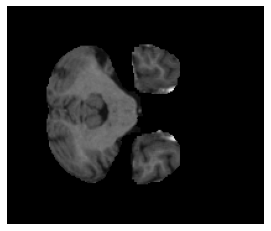

In [34]:
maxval = 154
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 0
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

In [47]:
# Define a function to visualize the data
def explore_3dimage_axial(layer):
    plt.figure(figsize=(10, 5))
    channel = 0
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_axial, layer=(0, image_data.shape[0] - 1));

interactive(children=(IntSlider(value=87, description='layer', max=175), Output()), _dom_classes=('widget-inte…

In [21]:
# Define a function to visualize the data
def explore_3dimage_sagittal(layer):
    plt.figure(figsize=(10, 5))
    channel = 0
    plt.imshow(image_data[layer, :, :,  channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_sagittal, layer=(0, image_data.shape[0] - 1));

interactive(children=(IntSlider(value=87, description='layer', max=175), Output()), _dom_classes=('widget-inte…

In [22]:
# Define a function to visualize the data
def explore_3dimage_coronal(layer):
    plt.figure(figsize=(10, 5))
    channel = 0
    plt.imshow(image_data[:,layer, :,  channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_coronal, layer=(0, image_data.shape[0] - 1));

interactive(children=(IntSlider(value=87, description='layer', max=175), Output()), _dom_classes=('widget-inte…

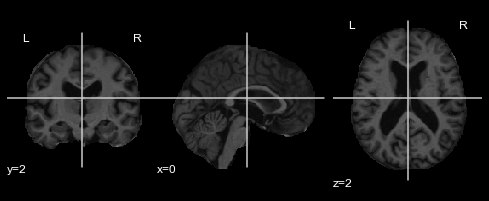

In [31]:
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
plot_anat(image_obj)



## Divide by labels

In [ ]:
meta_train = pd.read_csv('../data/OASIS/meta_train.csv')
